In [1]:
from csv import DictReader

with open('schweidtmann_train.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    _c_tr = [r for r in reader]
csv_file.close()
comp_train = []
for c in _c_tr:
    if c['Meas MON'] != 'n.a.':
        comp_train.append(c)

with open('schweidtmann_test.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    _c_te = [r for r in reader]
csv_file.close()
comp_test = []
for c in _c_te:
    if c['Meas MON'] != 'n.a.':
        comp_test.append(c)

smiles_train = [c[' SMILES'] for c in comp_train]
targets_train = [[float(c['Meas MON'])] for c in comp_train]
smiles_test = [c[' SMILES'] for c in comp_test]
targets_test = [[float(c['Meas MON'])] for c in comp_test]

In [2]:
from graphchem import CompoundOperator

co = CompoundOperator()
train_loss, valid_loss = co.train(
    smiles_train, targets_train, verbose=10,
    valid_size=0.33,
    valid_patience=128,
    batch_size=32,
    epochs=2048,
    random_state=None,
    shuffle=True,
    lr=0.001,
    lr_decay=0.0,
    model_config={
        'n_messages': 2,
        'n_hidden': 1,
        'hidden_dim': 256,
        'dropout': 0.0
    }
)

Epoch: 0 | Train Loss: 5984.2586080143965 | Valid Loss: 4629.203125
Epoch: 10 | Train Loss: 993.6954839470682 | Valid Loss: 804.9341430664062
Epoch: 20 | Train Loss: 663.2266900566187 | Valid Loss: 578.1728515625
Epoch: 30 | Train Loss: 465.76038694917486 | Valid Loss: 419.0660400390625
Epoch: 40 | Train Loss: 441.8131189239159 | Valid Loss: 320.3233947753906
Epoch: 50 | Train Loss: 358.9902388326238 | Valid Loss: 242.38426208496094
Epoch: 60 | Train Loss: 294.70729459269666 | Valid Loss: 223.3058319091797
Epoch: 70 | Train Loss: 270.55724000395014 | Valid Loss: 179.421875
Epoch: 80 | Train Loss: 246.3037016793583 | Valid Loss: 196.96923828125
Epoch: 90 | Train Loss: 237.1206839915072 | Valid Loss: 168.51748657226562
Epoch: 100 | Train Loss: 180.80355594935043 | Valid Loss: 163.3191680908203
Epoch: 110 | Train Loss: 211.0696991481138 | Valid Loss: 143.39358520507812
Epoch: 120 | Train Loss: 225.64798762289325 | Valid Loss: 151.14935302734375
Epoch: 130 | Train Loss: 201.97742144981126 

In [3]:
from sklearn.metrics import mean_absolute_error, r2_score

pred_train = co.use(smiles_train)
pred_test = co.use(smiles_test)
print('MAE Train: {}'.format(
    mean_absolute_error(targets_train, pred_train)
))
print('MAE Test: {}'.format(
    mean_absolute_error(targets_test, pred_test)
))
print('R2 Train: {}'.format(
    r2_score(targets_train, pred_train)
))
print('R2 Test: {}'.format(
    r2_score(targets_test, pred_test)
))


MAE Train: 1.7831341557734914
MAE Test: 6.295100739422967
R2 Train: 0.972662011608395
R2 Test: 0.7336051150532368


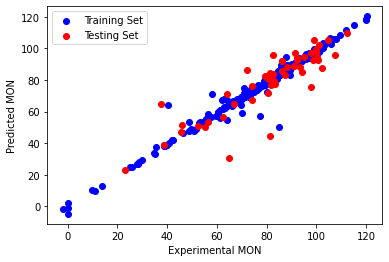

In [4]:
from matplotlib import pyplot as plt

plt.clf()
plt.xlabel('Experimental MON')
plt.ylabel('Predicted MON')
plt.scatter(targets_train, pred_train, color='blue', label='Training Set')
plt.scatter(targets_test, pred_test, color='red', label='Testing Set')
plt.legend(loc='upper left')
plt.show()

In [5]:
co.save_model('model_mon.pt', 'encoder_mon.enc')

In [6]:
co2 = CompoundOperator()
co2.load_model('model_mon.pt', 'encoder_mon.enc')
pred_train = co2.use(smiles_train)
pred_test = co2.use(smiles_test)
print('MAE Train: {}'.format(
    mean_absolute_error(targets_train, pred_train)
))
print('MAE Test: {}'.format(
    mean_absolute_error(targets_test, pred_test)
))
print('R2 Train: {}'.format(
    r2_score(targets_train, pred_train)
))
print('R2 Test: {}'.format(
    r2_score(targets_test, pred_test)
))

MAE Train: 1.7831341557734914
MAE Test: 6.295100739422967
R2 Train: 0.972662011608395
R2 Test: 0.7336051150532368


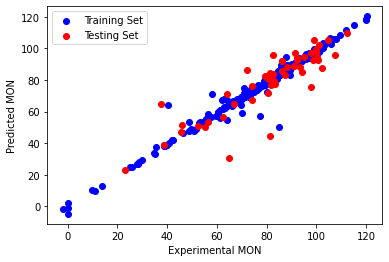

In [7]:
plt.clf()
plt.xlabel('Experimental MON')
plt.ylabel('Predicted MON')
plt.scatter(targets_train, pred_train, color='blue', label='Training Set')
plt.scatter(targets_test, pred_test, color='red', label='Testing Set')
plt.legend(loc='upper left')
plt.show()